# Analyze person image with ToolUse or not
- [Tool use API examples](https://docs.aws.amazon.com/bedrock/latest/userguide/tool-use-examples.html)

## 1. 환경 세팅

In [10]:
# is_needed_install = True
is_needed_install = False

if is_needed_install:
    # ! pip install -U boto3 langchain_aws anthropic
    ! pip install -U boto3 

In [11]:
%load_ext autoreload
%autoreload 2

from utils_bedrock_skin_gender import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. 이미지 지정

In [12]:
# prepped_images = "skin_gender_img/amazon_big_size_photo.jpeg"
prepped_images = "skin_gender_img/black_man.png"
# prepped_images = "skin_gender_img/white_woman.png"



## 3. 프롬프트 및 Tool 세팅

In [13]:
from textwrap import dedent

prompt_no_tooluse = dedent(
    """
    나만의 이미지 생성 프롬프트 만들어줘
    """
)

prompt_tooluse = dedent(
    """
    나만의 이미지 생성 프롬프트 만들어줘
    """
)


# model_id ="anthropic.claude-3-5-sonnet-20240620-v1:0"
model_id = "anthropic.claude-3-5-sonnet-20241022-v2:0"

tool_config = {
"tools": [
    {
        "toolSpec": {
            "name": "create_my_image_prompt",
            "description": "이미지를 분석해서 얼굴색 및 성별을 알아내고, 얼굴색 및 성별에 맞는 중세시대 기사의 영웅적인 자화상을 만드는 이미지 생성 프롬프트를 만드는 툴 입니다",
            "inputSchema": {
                "json": {
                    "type": "object",
                    "properties": {
                        "image_prompt_en": {
                            "type": "string",
                            "description": "Generate a heroic medieval knight image prompt using the given gender and skin tone from the reference image"
                        },
                        "image_prompt_kr": {
                            "type": "string",
                            "description": "주어진 이미지의 성별, 피부색을 사용해서 중세시대 기사의 영웅적인 이미지 생성 프롬프트"
                        },
                        "gender": {
                            "type": "string",
                            "description": "성별을 알려줘"
                        },
                        "skin_color": {
                            "type": "string",
                            "description": "피부색을 알려줘"
                        },

                    },
                    "required": [
                        "image_prompt_en",
                        "image_prompt_kr",
                        "gender",                        
                        "skin_color",
                    ]
                }
            }
        }
    }
]
}

# inference config
inference_config = {
    "maxTokens": 4096,
    "temperature": 0,
    "topP": 0.1,
    "stopSequences": ["\n\nHuman:", "\n\nToolUse:"]
}

bedrock_client = boto3.client(service_name='bedrock-runtime')




## 4. ToolUse 없이 Claude 에서 이미지 전달하여, Prommt 에 반응

In [14]:
try:
    isToollUse = False
    messages = generate_text(bedrock_client, model_id, tool_config, 
                            prompt_no_tooluse, 
                            prepped_images,
                            inference_config,
                            # tools=isToollUse,
                            tools=isToollUse,   
                            verbose=False,                         
                            )


except ClientError as err:
    messages = err.response['Error']['Message']
    print("A client error occurred: %s", message)
    print(f"A client error occured: {message}")

if isToollUse:
    parse_korean_comments_tools(messages)
else:
    parse_korean_comments(messages)


## Generating text with model %s anthropic.claude-3-5-sonnet-20241022-v2:0
ToolUse is NOT used


이 이미지를 바탕으로 한 프롬프트를 작성해드리겠습니다:.
"정면을 바라보는 클로즈업 초상화, 자연스러운 표정, 중성적인 베이지색 배경, 깔끔한 흰색 티셔츠, 선명한 스튜디오 조명, 부드러운 그림자와 하이라이트, 고해상도, 사실적인 피부 질감, 미니멀한 스타일링".
이 프롬프트는 다음과 같은 핵심 요소들을 포함합니다:.
- 정면을 향한 구도.
- 자연스러운 표정과 감정.
- 심플한 의상과 배경.
- 전문적인 스튜디오 조명.
- 깨끗하고 선명한 이미지 품질.


## 5. Claude 에서 이미지 전달하고, ToolUse 를 이용하여 Prommt 에 반응

In [15]:
try:
    isToollUse = True

    messages = generate_text(bedrock_client, model_id, tool_config, 
                            prompt_tooluse, 
                            prepped_images,
                            inference_config,
                            tools=isToollUse,   
                            # verbose=False,                         
                            verbose=True,                                                     
                            )


except ClientError as err:
    messages = err.response['Error']['Message']
    print("A client error occurred: %s", messages)
    print(f"A client error occured: {messages}")



## Generating text with model %s anthropic.claude-3-5-sonnet-20241022-v2:0
ToolUse is used
##response: after the first converse() with the query and tool_config 
{
  "ResponseMetadata": {
    "RequestId": "aac712df-62c6-455d-9c15-9591dd4b7d39",
    "HTTPStatusCode": 200,
    "HTTPHeaders": {
      "date": "Wed, 06 Nov 2024 12:16:58 GMT",
      "content-type": "application/json",
      "content-length": "1281",
      "connection": "keep-alive",
      "x-amzn-requestid": "aac712df-62c6-455d-9c15-9591dd4b7d39"
    },
    "RetryAttempts": 0
  },
  "output": {
    "message": {
      "role": "assistant",
      "content": [
        {
          "text": "이미지를 분석해 보니 어두운 피부톤을 가진 남성의 모습이 보입니다. 이 특징들을 바탕으로 중세시대 기사의 영웅적인 이미지 프롬프트를 생성해드리겠습니다."
        },
        {
          "toolUse": {
            "toolUseId": "tooluse_K5W36KrvSoyUOSRWrBdSLw",
            "name": "create_my_image_prompt",
            "input": {
              "gender": "male",
              "skin_color": "dark",
              "image

### 파싱해서 결과 보기

In [16]:
if isToollUse:
    image_prompt_en, image_prompt_kr, gender, skin_coler = parse_korean_comments_tools(messages)
else:
    parse_korean_comments(messages)


##################################################
## Response directly from LLM
##################################################
text from LLM:
이미지를 분석해 보니 어두운 피부톤을 가진 남성의 모습이 보입니다. 이 특징들을 바탕으로 중세시대 기사의 영웅적인 이미지 프롬프트를 생성해드리겠습니다.
##################################################
## Response from ToolUse
##################################################
Describe image in en :
A heroic medieval knight with dark skin tone, wearing gleaming silver armor adorned with intricate gold details.
He stands proudly with a noble posture, wielding a magnificent sword.
His determined expression shows courage and wisdom.
The background features a majestic castle during sunset, creating a dramatic atmosphere.
Describe image in kr :
어두운 피부톤의 영웅적인 중세 기사가 빛나는 은색 갑옷을 입고 있으며, 갑옷에는 정교한 금색 장식이 새겨져 있습니다.
그는 웅장한 검을 들고 당당하게 서 있으며, 그의 결연한 표정에서는 용기와 지혜가 엿보입니다.
배경에는 일몰 무렵의 웅장한 성이 극적인 분위기를 자아냅니다.
Gender: male
Skin color: dark


## 6. 이미지 생성

### 원본 이미지

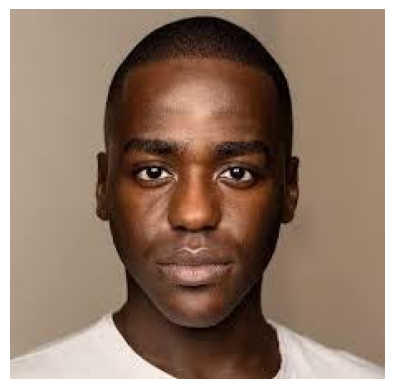

In [17]:
show_image(prepped_images)

### 이미지 생성 프롬프트에 따라 생성된 이미지

Image saved as 'generated_image.png'


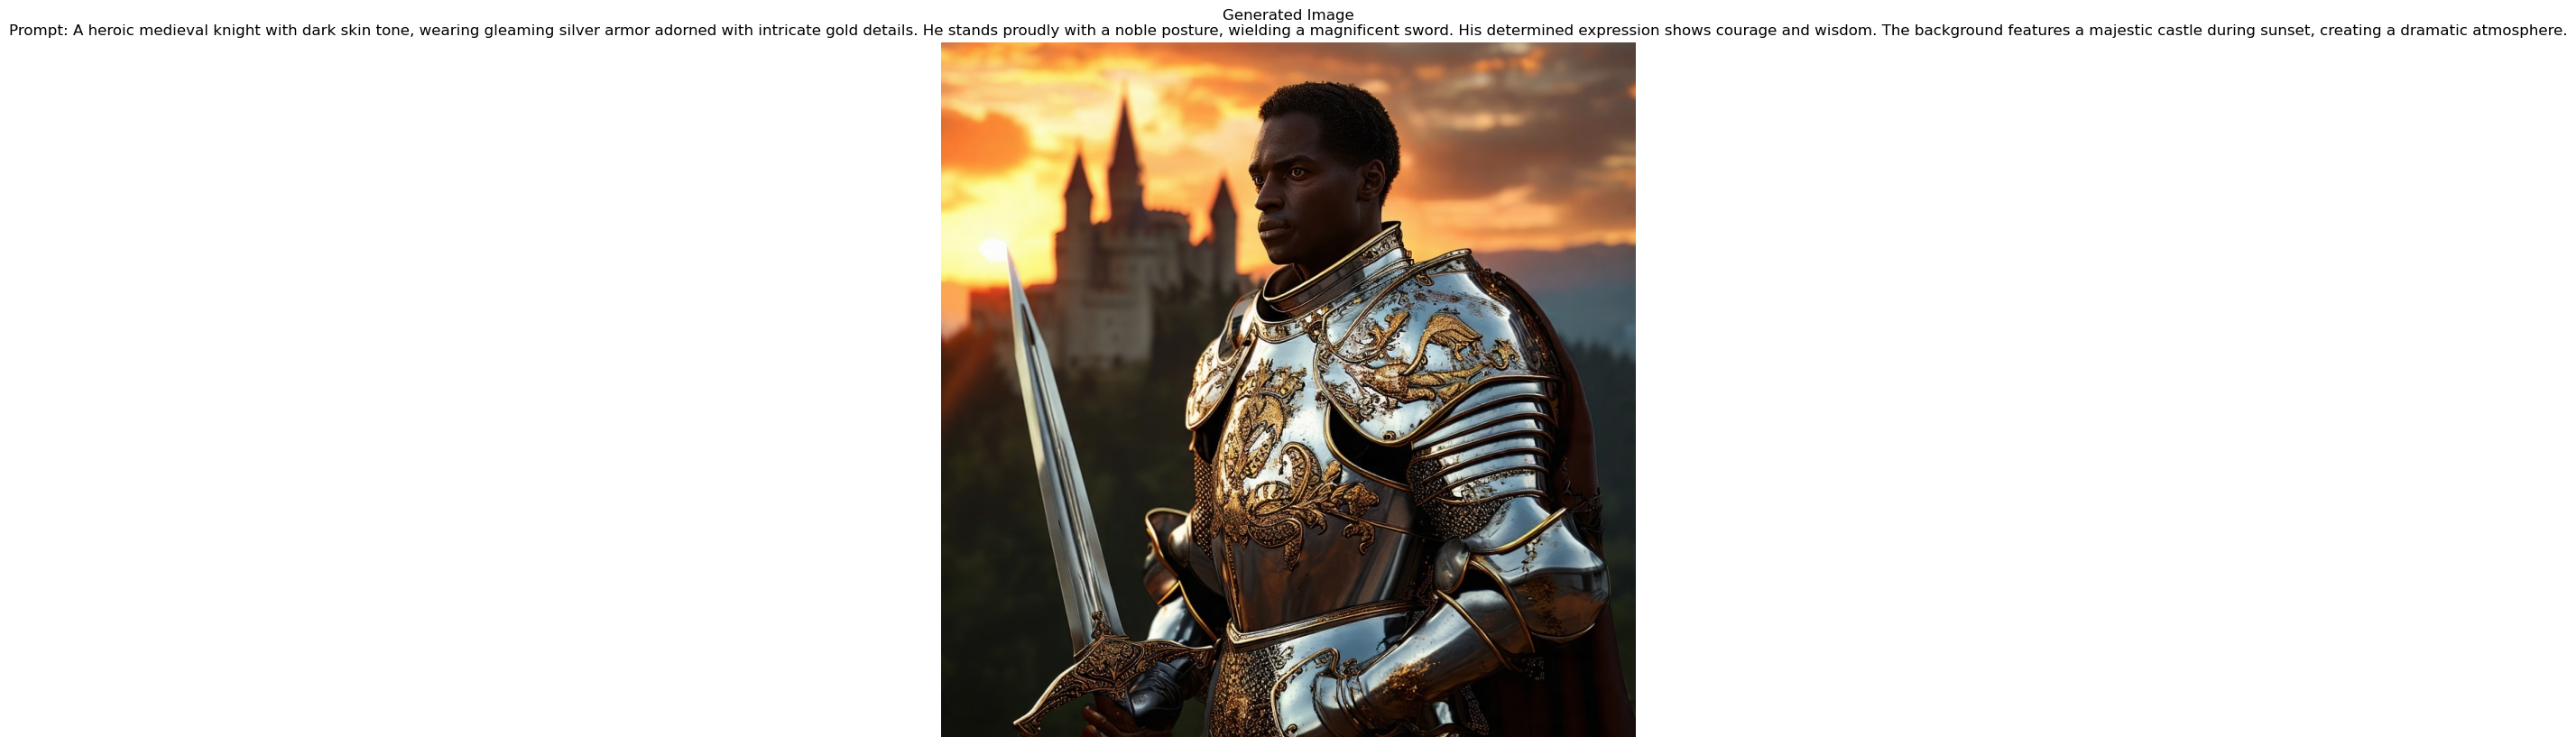

Image saved as 'result_image/generated_image.png'


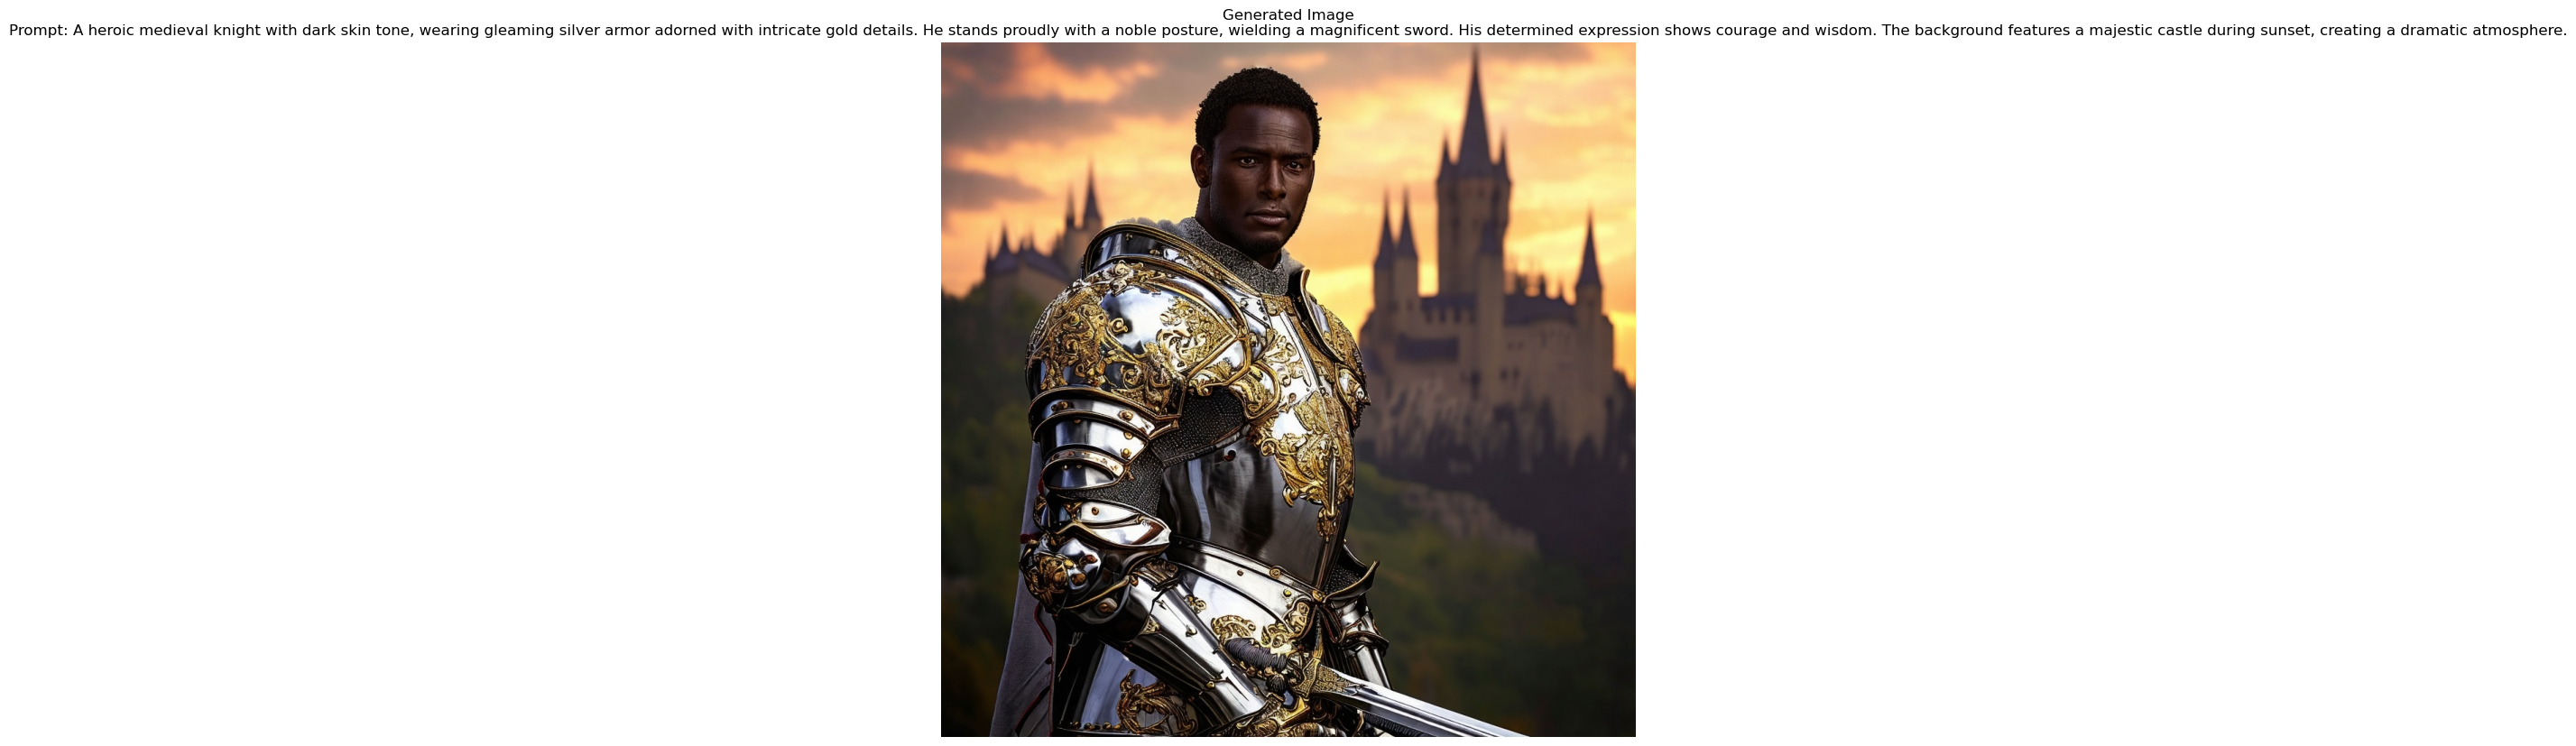

In [18]:
# 사용 예시
generated_image = generate_and_show_image(image_prompt_en)
save_image = "result_image/generated_image.png"
generate_and_show_image(image_prompt_en, save_path=save_image)


        

